# Fetal Health Classification

This work is a compilation of all the work done under the Analytics Edge module at EMINES School Of Industiral Management. We'll be studying and using multiple aspects of Machine Learning in order to predict the values of a dependent variable based on multiple independent variables. The dataset can be found on <a href="https://www.kaggle.com/andrewmvd/fetal-health-classification">Kaggle</a>.

The dataset chosen revolves about fetal health classification (more coming later), this subject was chosen because of the team's interest in the medical field and how AI can predict real life outcomes.

This work is brought to you by CLASS2023 students : Ayat KERFATI, Salma EL ALOUANY, Asmae BOUJID, Hamza ADDI, Noemane EL HRIZI and Nassim CHABCHI.

<br/><br/><br/>

Before starting, let us mention that our notebook comes with built in music, funny ain't it?
<img src="https://64.media.tumblr.com/463e49eceade3e10c3a5133a060ee3c8/tumblr_phvwiqL38l1w0vra3o8_r1_500.gifv" />

You can stop the music anytime you want using this audio player. The music is only here to accompany you ofcourse :). 
(MYS - Snowman - <a href="https://www.youtube.com/watch?v=j9ziXYpFs1I">Youtube</a>)

Have a blast while reading.


<audio src="backgroundmusic.mp3" controls id="myaudio" />
<script>
  var audio = document.getElementById("myaudio");
  audio.volume = 0.2;
</script>

## Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

<div style="text-align: right"><i>source: <a href="https://www.kaggle.com/andrewmvd/fetal-health-classification">Kaggle</a></i></div>

### Roadmap (Summary)

We'll go through with our project as follows:

* Basic Data Manipulation and Inspection
* Data Cleaning and basic feature engineering
* Throwing our data at multiple classification models and evaluate how well they perform
    * We will eventually pick the top 3 models
* Enhanced Feature Engineering
* Evaluating each feature engineering method and selecting the best of them
* Challenge?
* Building our final model
* A Deep Learning approach

## Importing the Libraries

As in every machine learning project, we start by importing the libraries we'll be using throughout our roadmap. In our case we'll be working with `pandas` for data manipulation, `numpy` for numerical function imports, `seaborn` and `matplotlib.pyplot` for data visualisation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First things first, let's the import our data and inspect it.

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.shape

(2126, 22)

Looks like our data has 2126 sample, and 22 columns.

In [4]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

<table> <caption>Feature Columns Description</caption> <thead> <tr> <th>Column</th> <th>Description</th> </tr> </thead> <tbody> <tr><td>baseline value</td> <td>FHR baseline (beats per minute)</td></tr> 
    <tr><td>accelerations</td> <td>Number of accelerations per second</td></tr> 
    <tr><td>fetal_movement</td> <td>Number of fetal movements per second</td></tr> 
    <tr><td>uterine_contractions</td> <td>Number of uterine contractions per second</td></tr> 
    <tr><td>light_decelerations</td> <td>Number of light decelerations per second</td></tr> 
    <tr><td>severe_decelerations</td> <td>Number of severe decelerations per second</td></tr> 
    <tr><td>Number of severe decelerations per second</td> <td>Number of prolonged decelerations per second</td></tr> 
    <tr><td>Number of prolonged decelerations per second</td> <td>Percentage of time with abnormal short term variability</td></tr> 
    <tr><td>mean_value_of_short_term_variability</td> <td>Mean value of short term variability</td></tr> 
    <tr><td>percentage_of_time_with_abnormal_long_term_variability</td> <td>Percentage of time with abnormal long term variability</td></tr> 
    <tr><td>mean_value_of_long_term_variability</td> <td>Mean value of long term variability</td></tr> 
    <tr><td>histogram_width</td> <td>Width of FHR histogram</td></tr> 
    <tr><td>histogram_min</td> <td>Minimum (low frequency) of FHR histogram</td></tr> 
    <tr><td>histogram_max</td> <td>Maximum (high frequency) of FHR histogram</td></tr> 
    <tr><td>histogram_number_of_peaks</td> <td>Number of histogram peaks</td></tr> 
    <tr><td>histogram_number_of_zeroes</td> <td>Number of histogram peaks</td></tr> 
    <tr><td>histogram_mode</td> <td>Histogram mode</td></tr> 
    <tr><td>histogram_mean</td> <td>Histogram mean</td></tr> 
    <tr><td>histogram_mean</td> <td>Histogram median</td></tr> 
    <tr><td>histogram_variance</td> <td>Histogram variance</td></tr> 
    <tr><td>histogram_tendency</td> <td>Histogram tendency</td></tr> 
</tbody></table>

<div style="text-align: right;"><i>source: <a href="https://www.kaggle.com/andrewmvd/fetal-health-classification/discussion/194303">Kaggle</a></i></div>

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Looks like all our data is of type `np.float64`. With `fetal_health` being a categorical variable, `severe_decelerations` and `prolongued_decelerations` as almost zero variables; all the other variables are continuous.

## Data Diagnosis (aka EDA)

Our Target column is `fetal_health`, which means that we have 21 feature.

Let's examine our target column.

In [7]:
df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<table> <caption>fetal_health variable</caption> <thead> <tr> <th>Description</th> <th>fetal_health value</th></tr> </thead> <tbody> <tr> <td>Normal</td> <td>1</td> </tr> <tr> <td>Suspect</td> <td>2</td> </tr>
    <tr> <td>Patological</td> <td>3</td> </tr></tbody></table>

Let's examine our features. First we put them in a list then start examining them one by one.

In [8]:
features = list(df.columns.drop('fetal_health'))
target = 'fetal_health'

features

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

### baseline value

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'baseline value vs fetal_health')

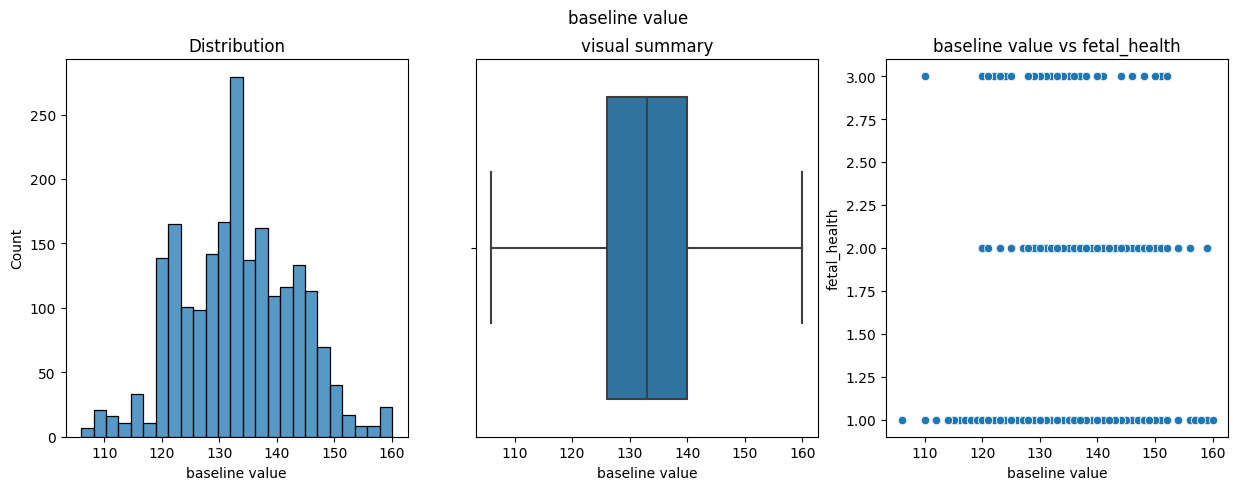

In [9]:
column = 'baseline value'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

The `baseline value` is normally distributed.

### accelerations

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'accelerations vs fetal_health')

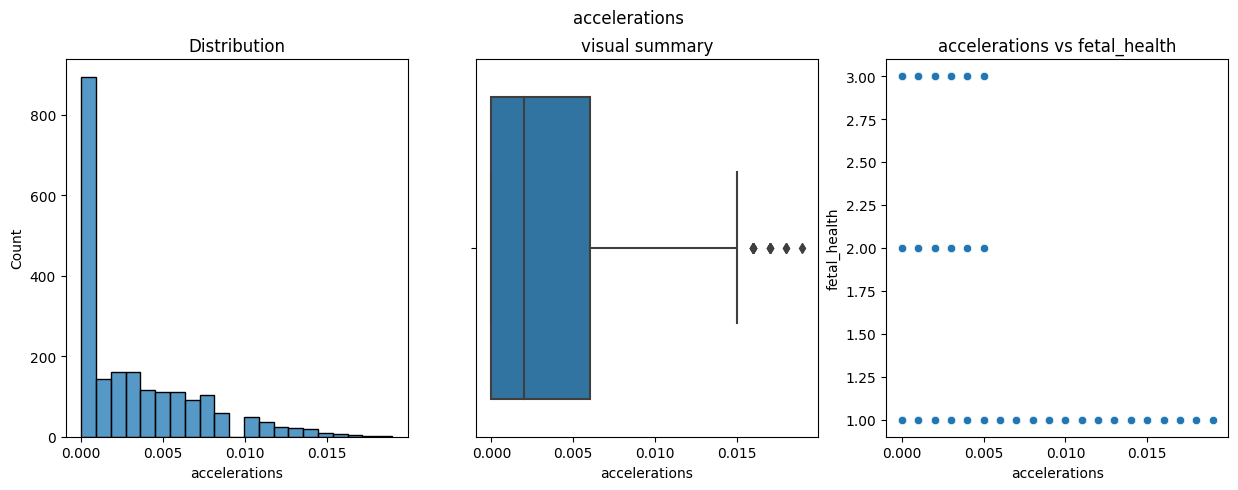

In [10]:
column = 'accelerations'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

Let's take note that `accelerations` are weaker (or lower) in suspect or patological patients.

### fetal_movement

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'fetal_movement vs fetal_health')

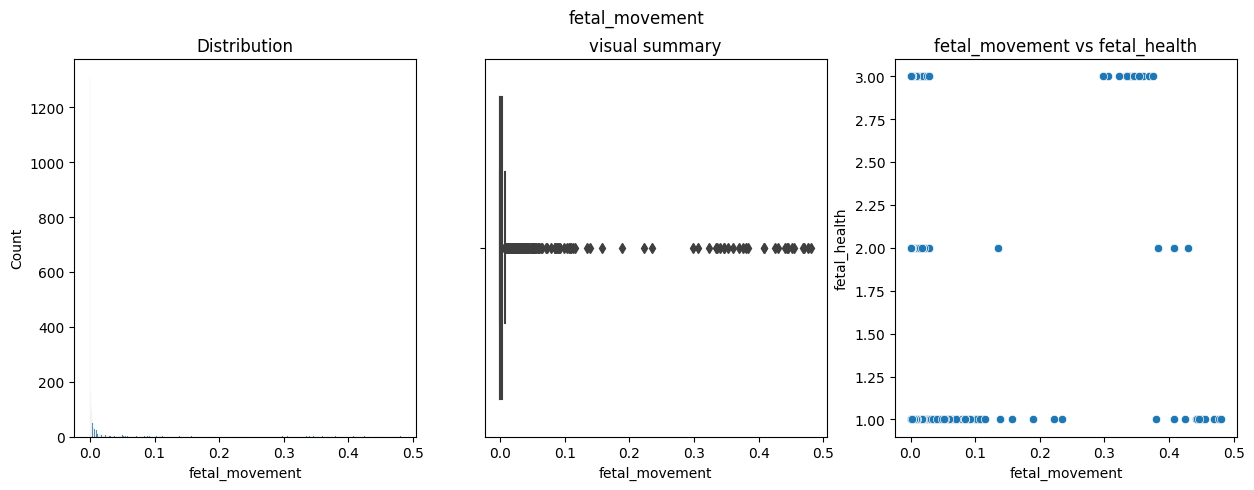

In [11]:
column = 'fetal_movement'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

We notice a **LOT** of outliers in the `fetal_movement` variable.

### uterine_contractions

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'uterine_contractions vs fetal_health')

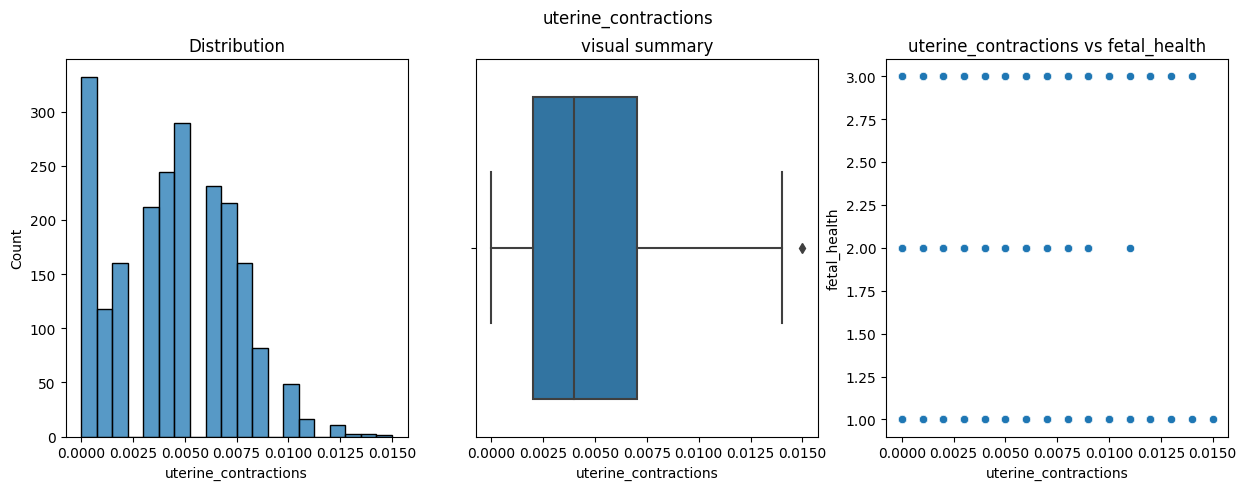

In [12]:
column = 'uterine_contractions'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### light_decelerations

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'light_decelerations vs fetal_health')

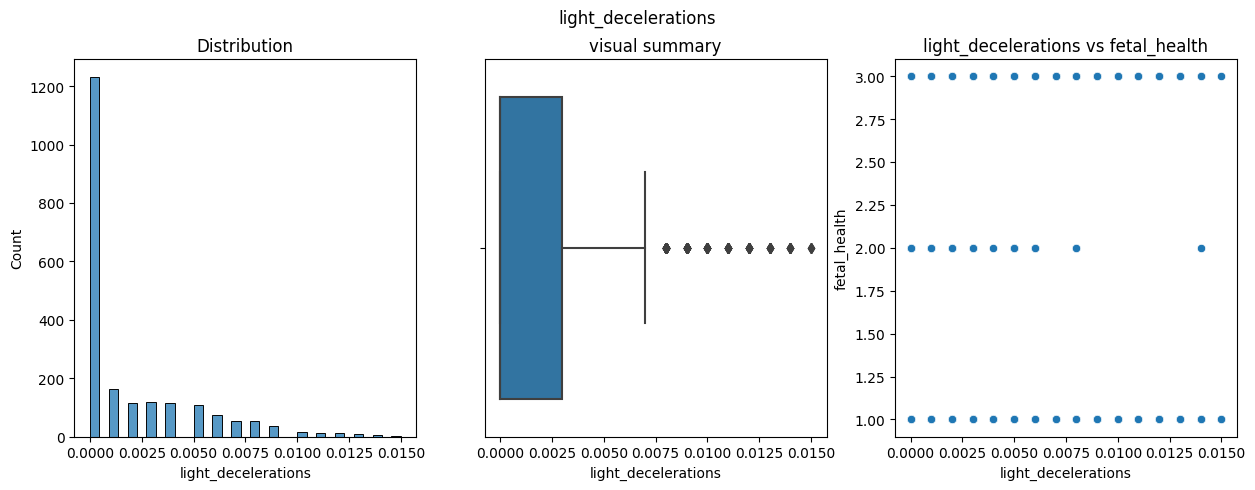

In [13]:
column = 'light_decelerations'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### severe_decelerations

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'severe_decelerations vs fetal_health')

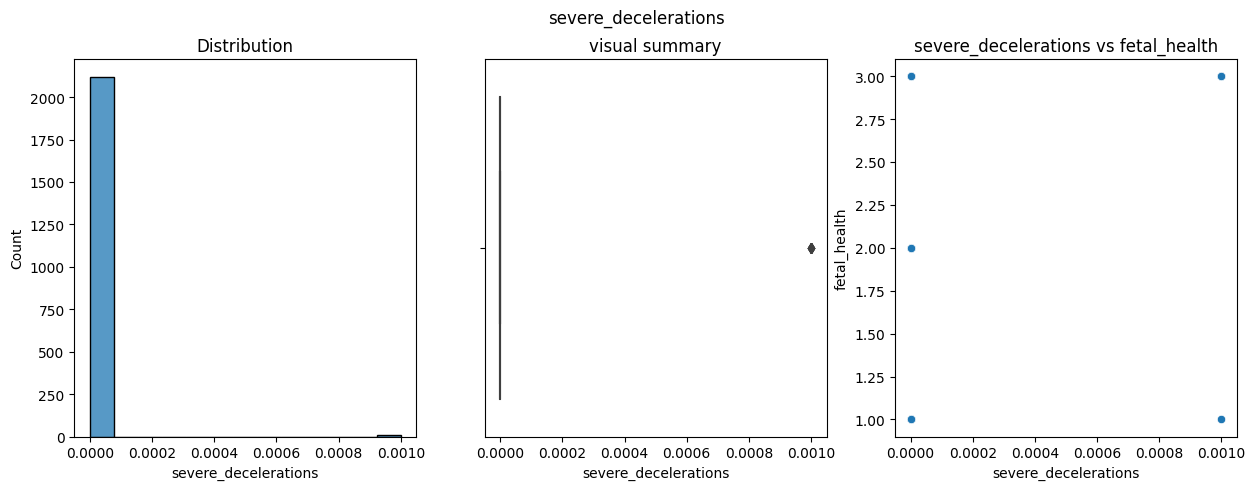

In [14]:
column = 'severe_decelerations'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

We notice that this variable is mostly zeroes, which makes it fairly insignificant in a modelisation way.

### prolongued_decelerations

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'prolongued_decelerations vs fetal_health')

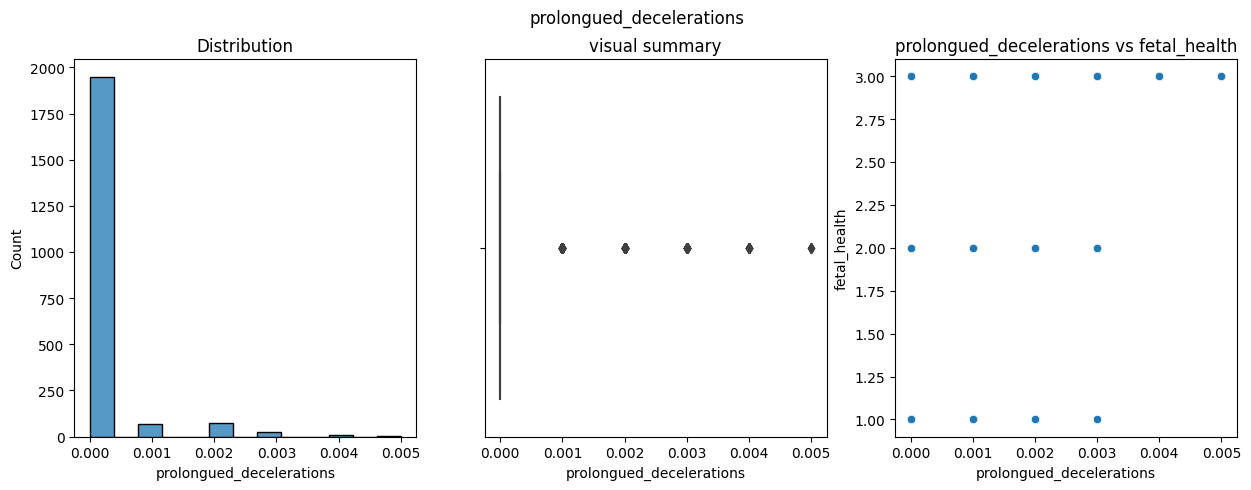

In [15]:
column = 'prolongued_decelerations'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

The same could be said about this variable too, it is fairly insignificant.

### light_decelerations

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'light_decelerations vs fetal_health')

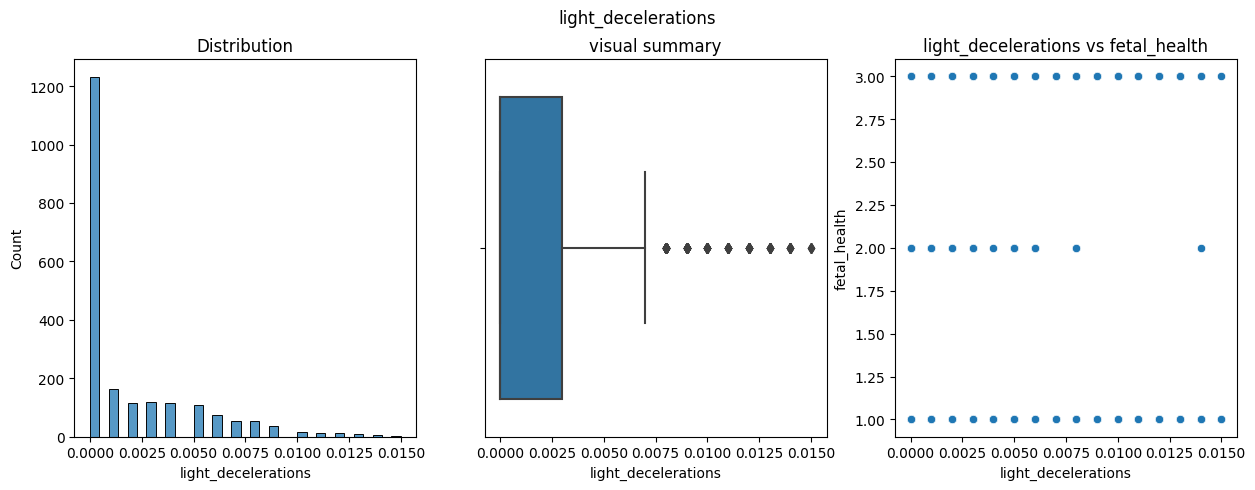

In [16]:
column = 'light_decelerations'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### abnormal_short_term_variability

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'abnormal_short_term_variability vs fetal_health')

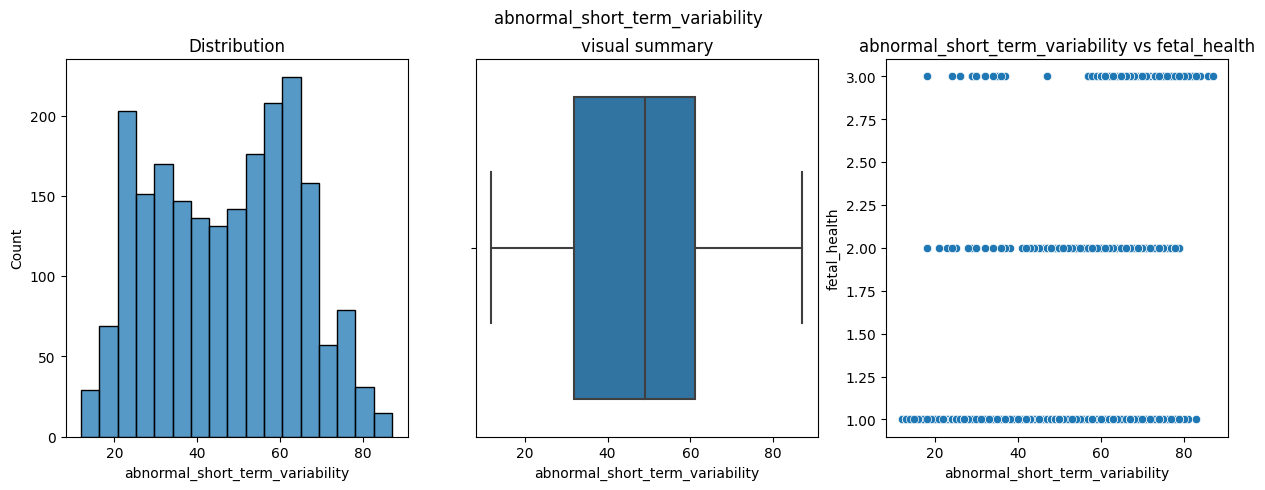

In [17]:
column = 'abnormal_short_term_variability'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### mean_value_of_short_term_variability

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'mean_value_of_short_term_variability vs fetal_health')

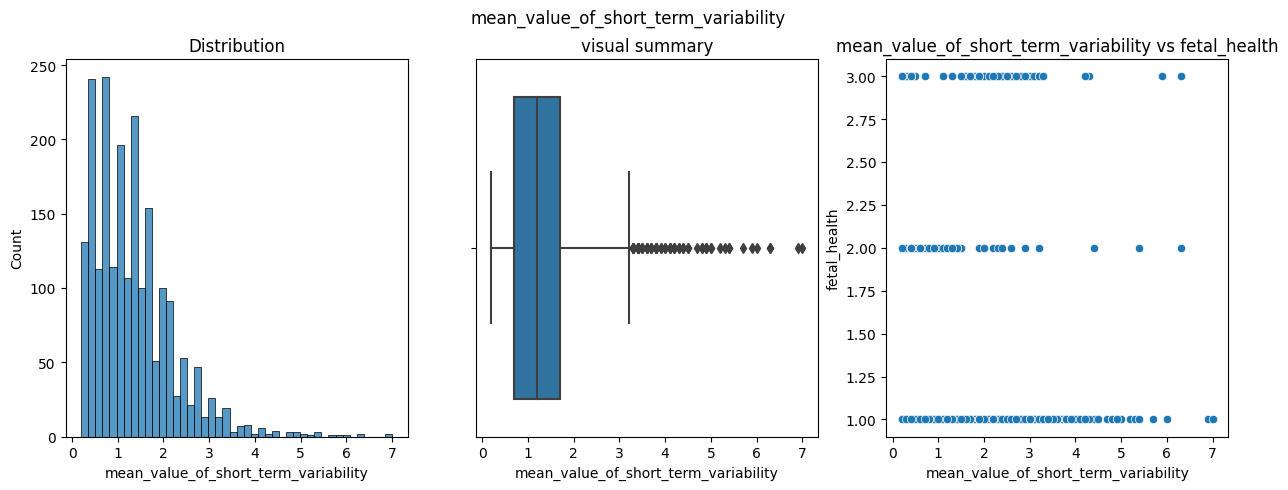

In [18]:
column = 'mean_value_of_short_term_variability'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

This variable presents a lot of outliers.

### percentage_of_time_with_abnormal_long_term_variability

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'percentage_of_time_with_abnormal_long_term_variability vs fetal_health')

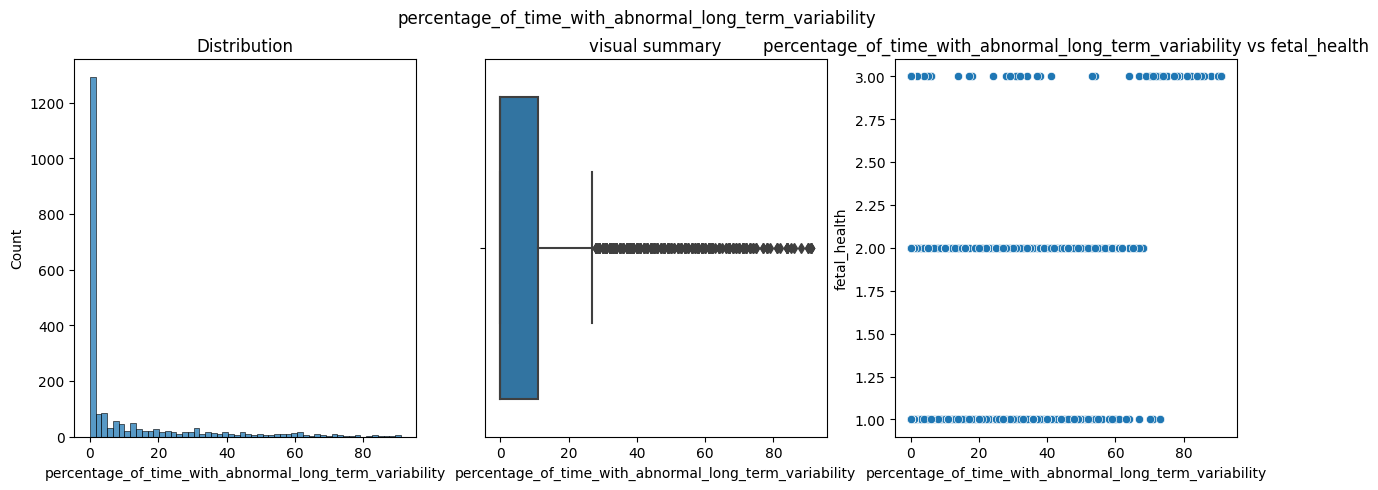

In [19]:
column = 'percentage_of_time_with_abnormal_long_term_variability'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

The percentage of time with abnormal long term variability is rather high in patological patients; This variable also presents a lot of outliers.

### mean_value_of_long_term_variability

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'mean_value_of_long_term_variability vs fetal_health')

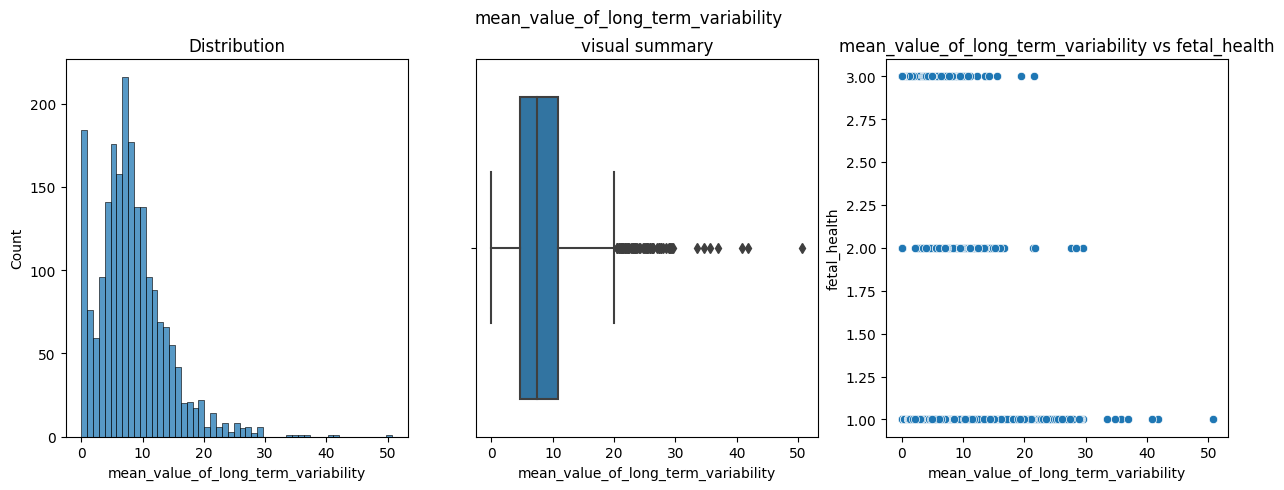

In [20]:
column = 'mean_value_of_long_term_variability'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

The mean value of long term variability is lower in suspect or patological patients. We also notice the existence of a lot of outliers.

### histogram_width

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_width vs fetal_health')

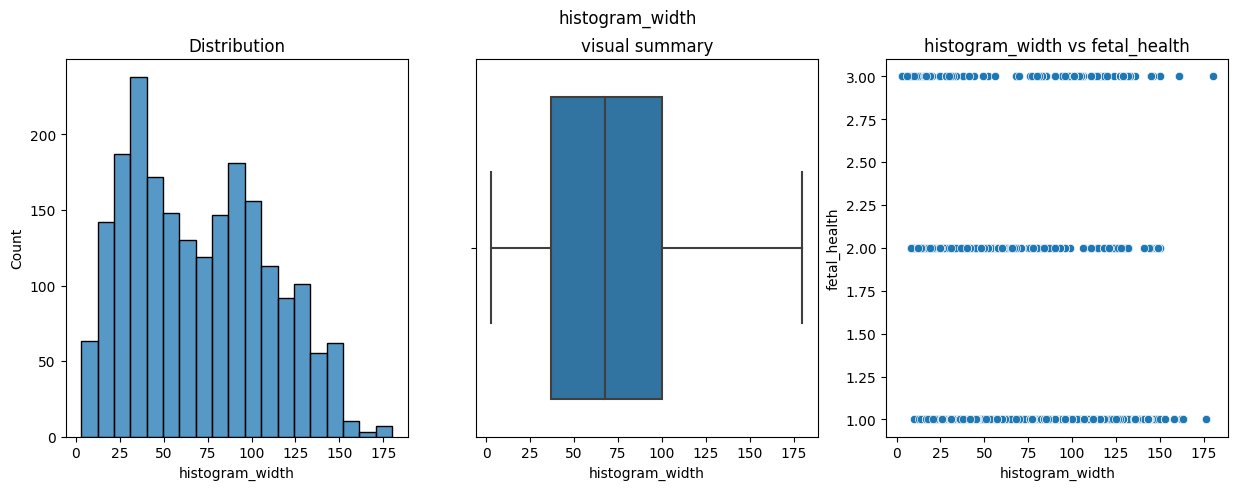

In [21]:
column = 'histogram_width'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_min

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_min vs fetal_health')

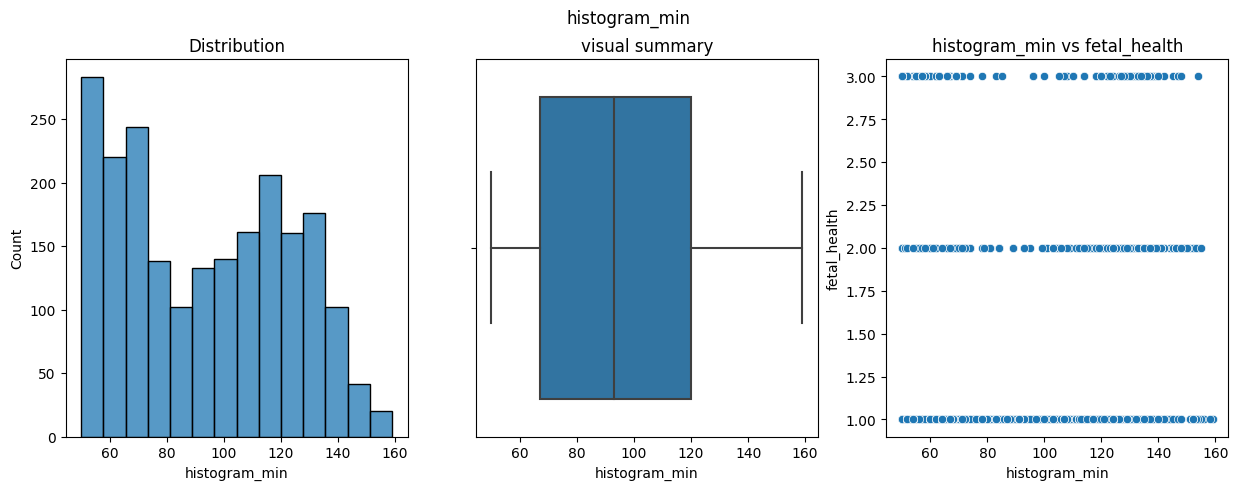

In [22]:
column = 'histogram_min'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_max

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_max vs fetal_health')

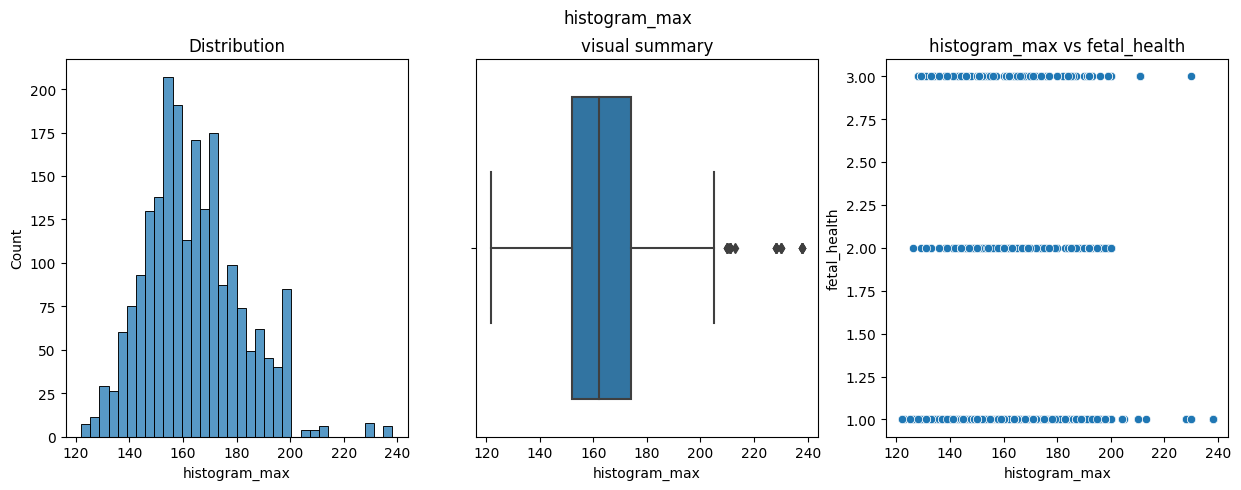

In [23]:
column = 'histogram_max'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_number_of_peaks

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_number_of_peaks vs fetal_health')

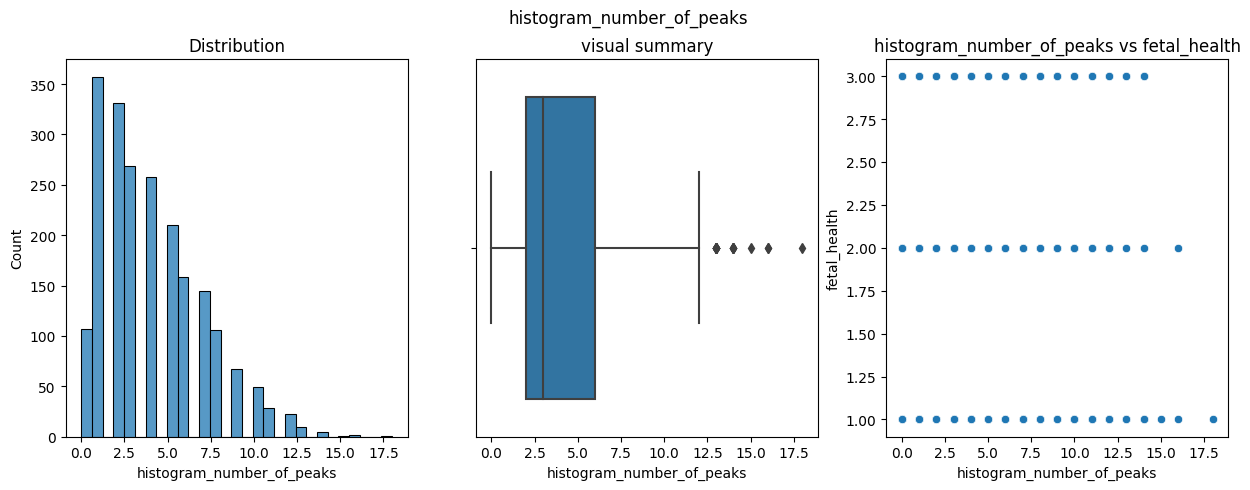

In [24]:
column = 'histogram_number_of_peaks'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_number_of_zeroes

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_number_of_zeroes vs fetal_health')

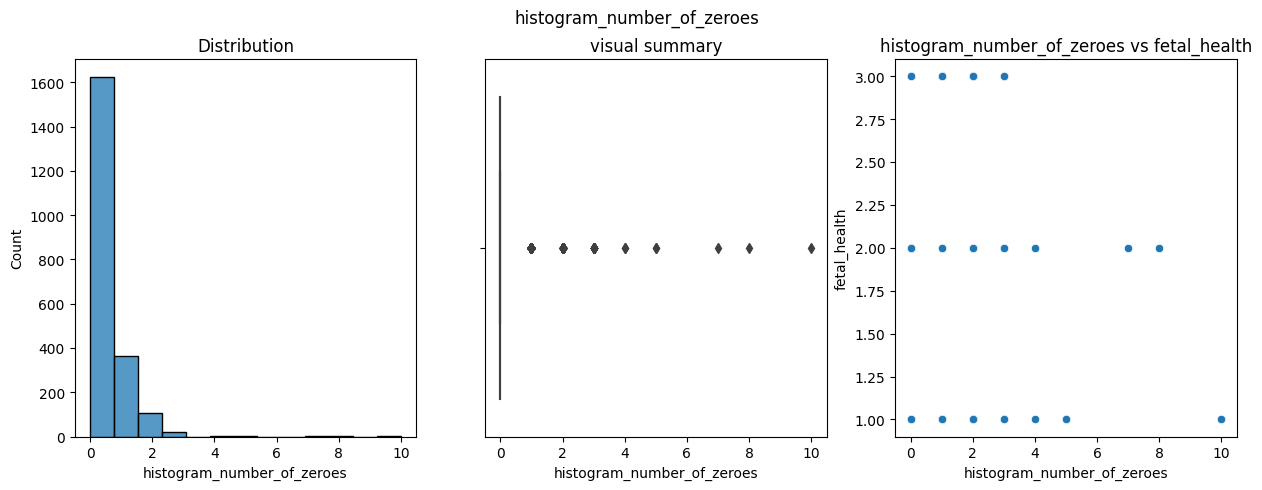

In [25]:
column = 'histogram_number_of_zeroes'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_mode

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_mode vs fetal_health')

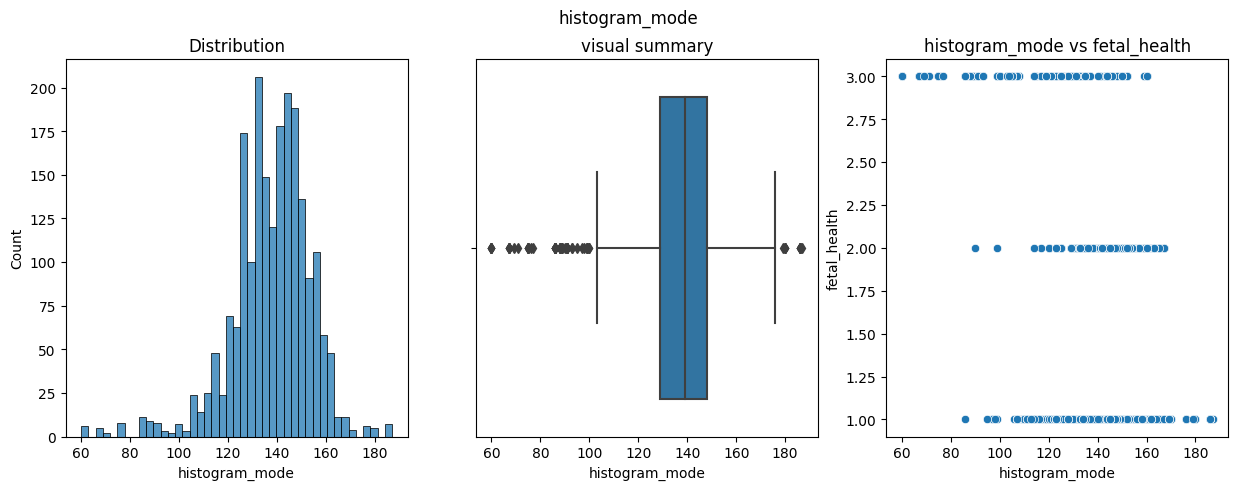

In [26]:
column = 'histogram_mode'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_mean

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_mean vs fetal_health')

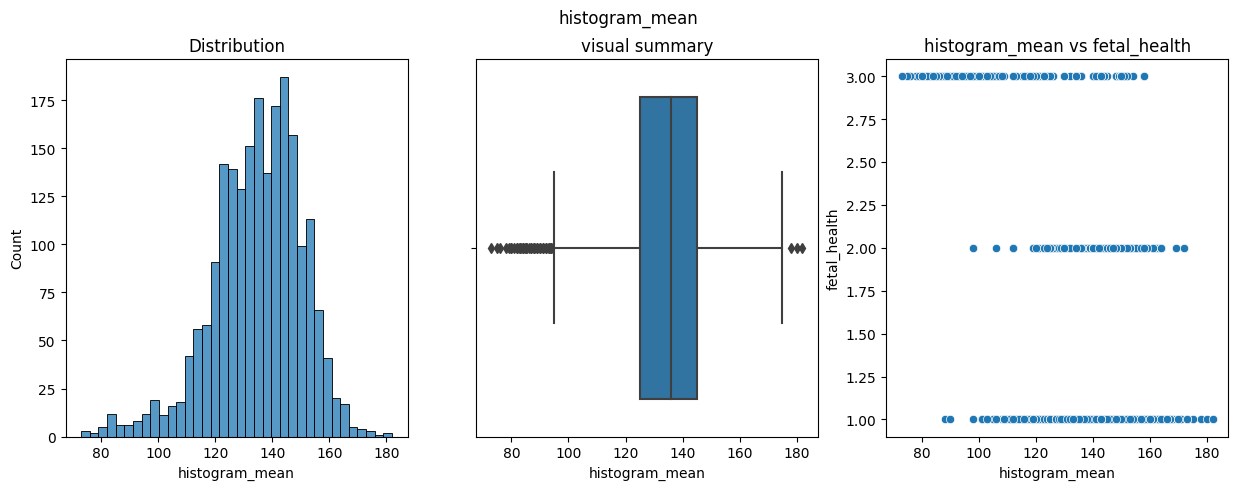

In [27]:
column = 'histogram_mean'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_median

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_median vs fetal_health')

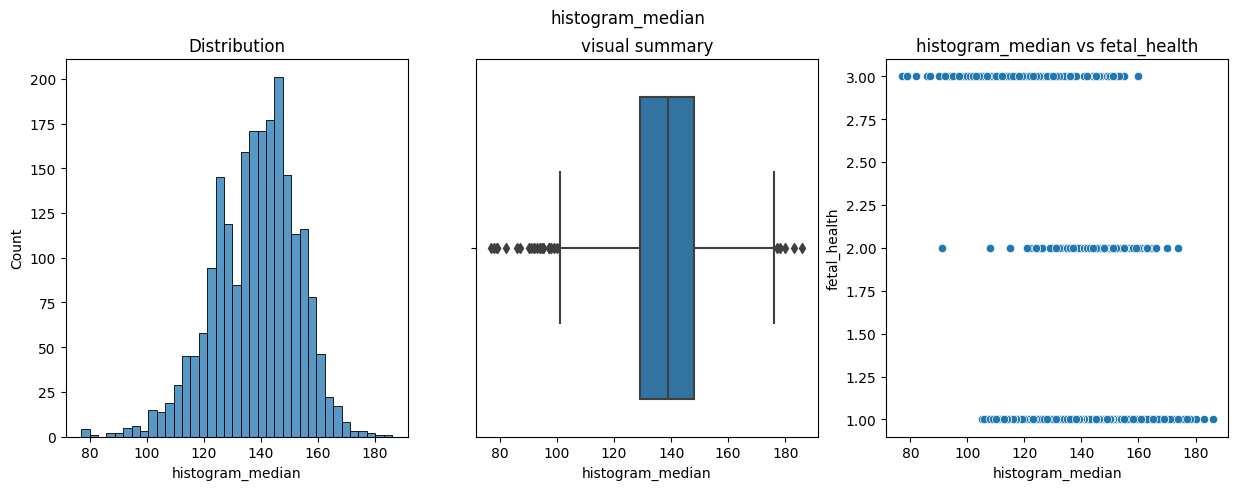

In [28]:
column = 'histogram_median'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_variance

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_variance vs fetal_health')

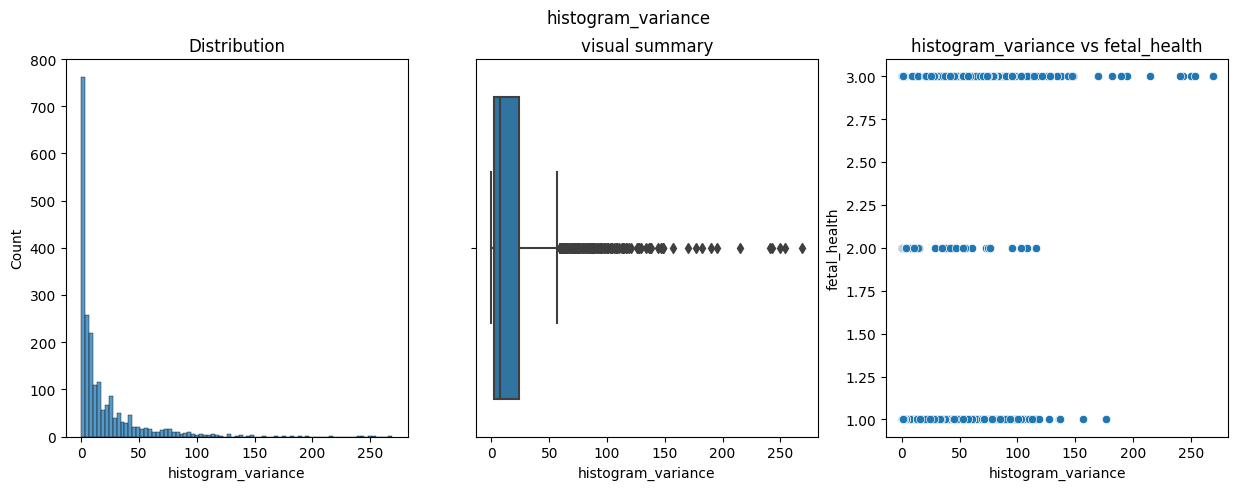

In [29]:
column = 'histogram_variance'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

### histogram_tendency

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'histogram_tendency vs fetal_health')

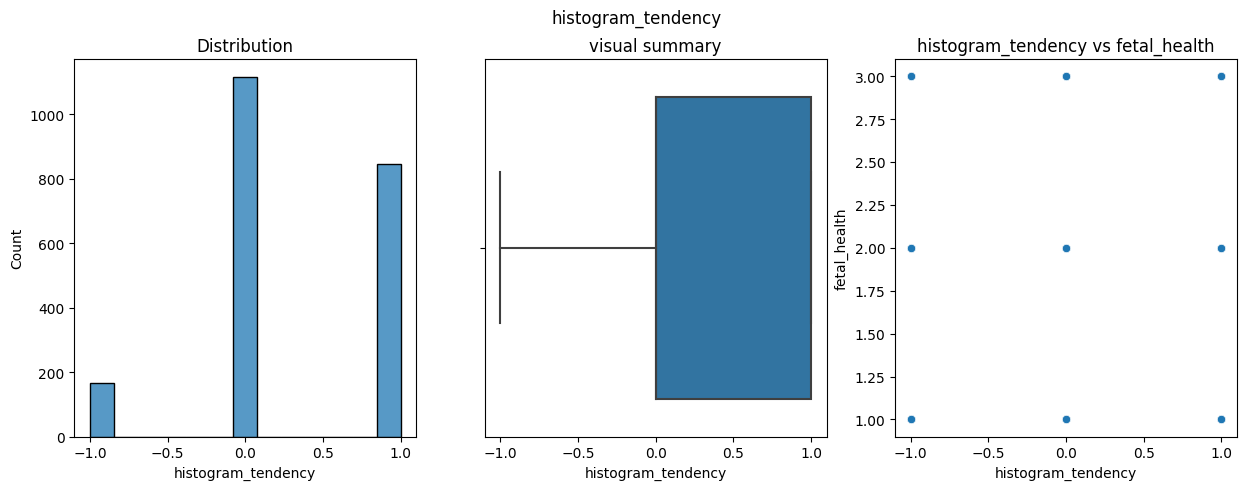

In [30]:
column = 'histogram_tendency'
fig, ax = plt.subplots(1,3)
fig.suptitle(column)
fig.set_tight_layout(False)
fig.set_dpi(100)
fig.set_size_inches(15,5)

sns.histplot(df[column], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(df[column], ax=ax[1])
ax[1].set_title('visual summary')

sns.scatterplot(x=df[column], y=df[target], ax=ax[2])
ax[2].set_title(f"{column} vs {target}")

Let's inspect the correlation matrix.

<AxesSubplot:>

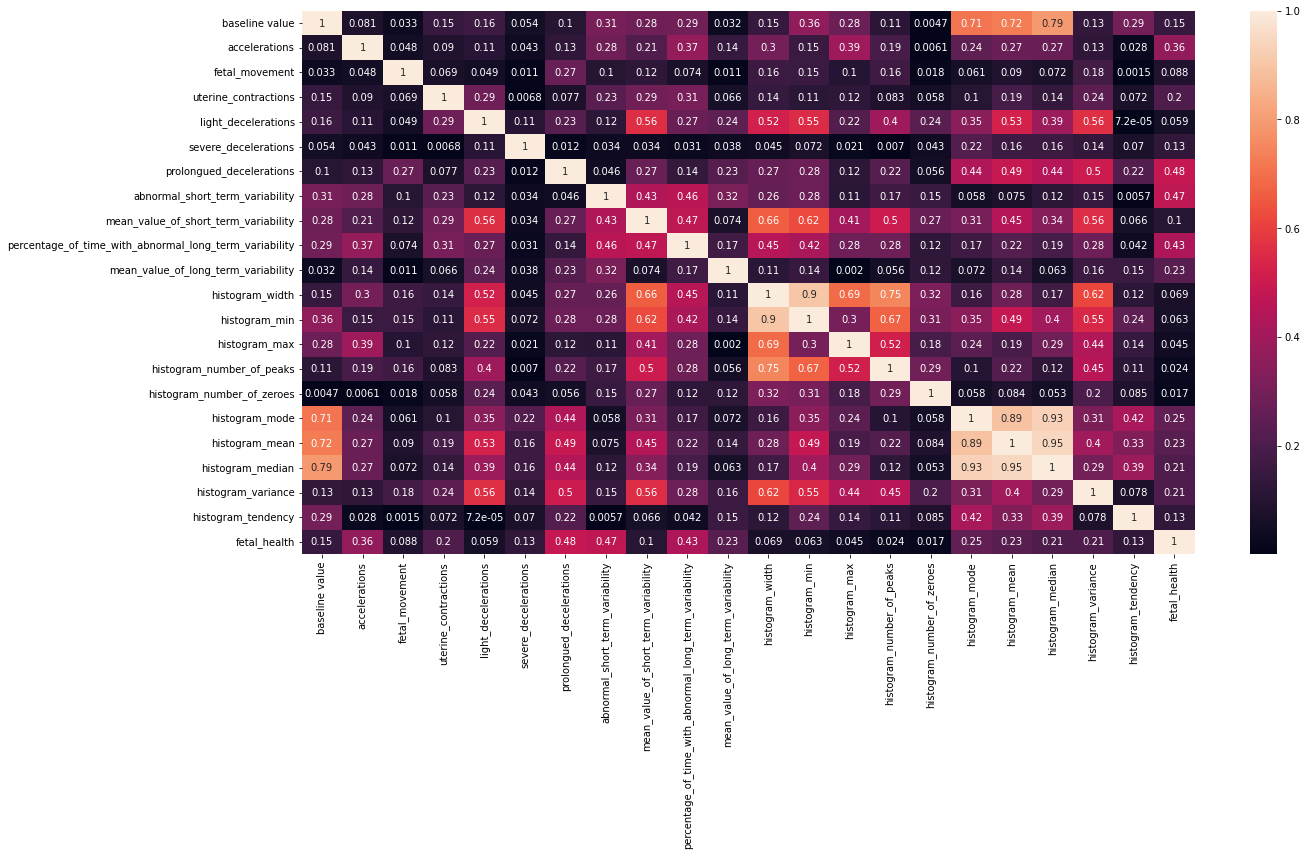

In [31]:
fig = plt.figure(figsize=(20,10))

sns.heatmap(df.corr().abs(), annot=True)

Most of our variables have a decent correlation with our target variable `fetal_health`. With the most noticable ones being : `prolongued_decelerations`, `abnormal_short_term_variability` and `percentage_of_time_with_abnormal_long_term_variability`.

We also notice that our data presents some multicolinearity issues, some variables are highly correlated with each other.

For instance :

* `histogram_width` and `histogram_min`.
* `histogram_mode`, `histogram_mean` and `histogram_median`.

## Statistical Evaluation

In this part, we'll be using statistical approaches to study our data. Let's start by importing the `scipy.stats` python module which contains all the functions we'll need.

In [32]:
import scipy.stats as stats

Let's first evaluate the skewness of each of our value, a feature's skewness value reflects it's distribution's symmetry.
For a Normal distribution, the value of the skewness is equal to 0.

$Skewness = \frac{3 (Mean - Median)}{Standrad Deviation}$

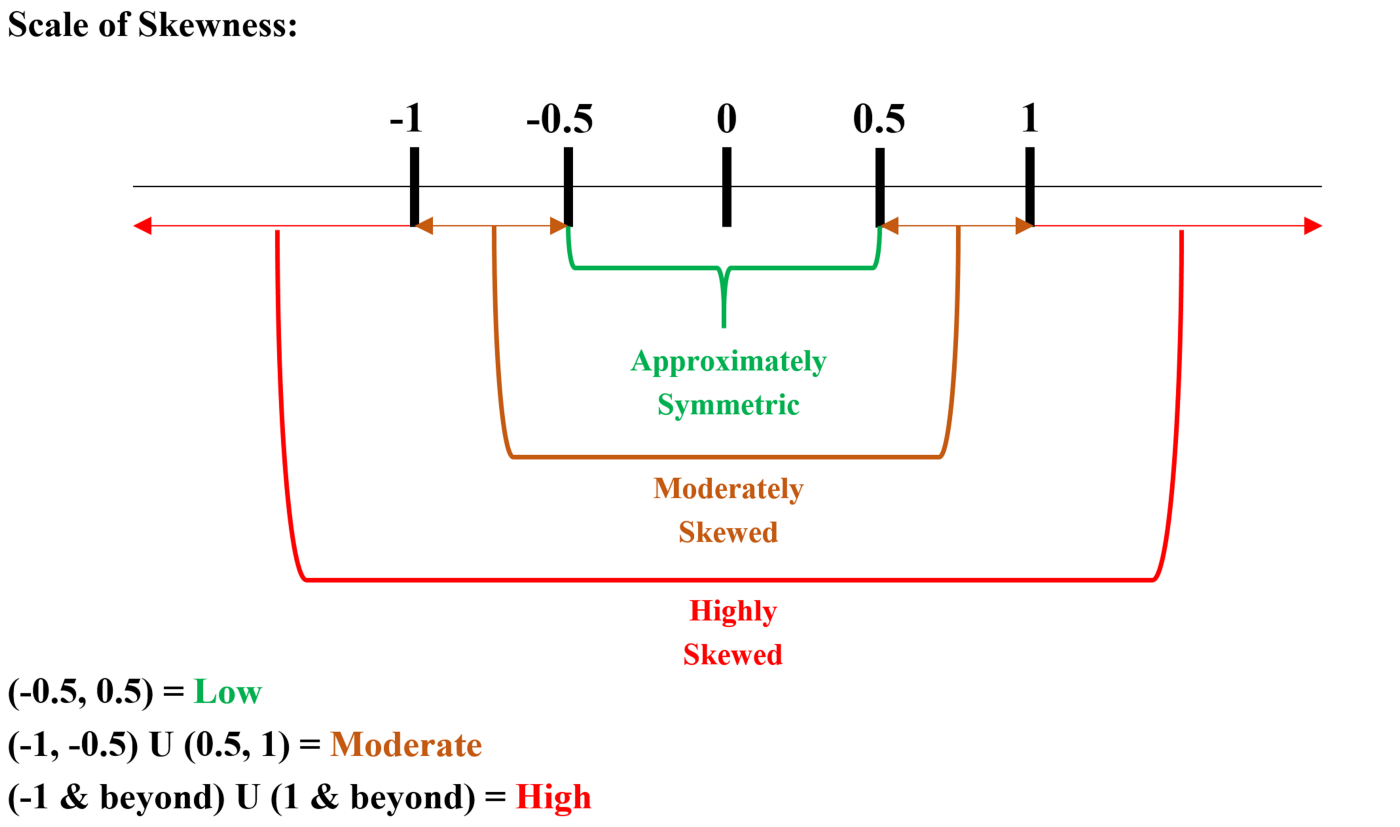
<div style="text-align: right"><i>source: <a href="https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85">Towards Data Science</a></i></div>

We won't be calculating this value ourselves, but we'll be using the `stats` module's `skew` function.

In [33]:
feature_skewness = pd.DataFrame(columns=['Feature', 'Skewness', 'ABS(Skewness)'])

for feature in features:
    feature_skewness = feature_skewness.append({'Feature' : feature, 'Skewness' : stats.skew(df[feature]),
                                                'ABS(Skewness)' : np.abs(stats.skew(df[feature]))}, ignore_index=True)

In [34]:
feature_skewness.sort_values(by=['ABS(Skewness)'], ascending=False)[['Feature', 'Skewness']]

,Feature,Skewness
5,severe_decelerations,17.341211
2,fetal_movement,7.805965
6,prolongued_decelerations,4.320914
15,histogram_number_of_zeroes,3.917521
19,histogram_variance,3.217702
9,percentage_of_time_with_abnormal_long_term_var...,2.193526
4,light_decelerations,1.717224
8,mean_value_of_short_term_variability,1.656170
10,mean_value_of_long_term_variability,1.331058
1,accelerations,1.203542


We notice multiple Highly skewed variables and some moderately skewed ones.

Let's check how many outliers we actually have. To do this, we'll be using the Inter Quartile method (the numerical method of using a boxplot).

In [35]:
features_outliers = pd.DataFrame(columns=['Feature', 'Number of suspect outliers', 'Percentage of suspect outliers'])

for feature in features:
    data = df[feature]
#     q1 = np.percentile(data, 1)
#     q3 = np.percentile(data, 3)
    
#     iqr = q3 - q1
#     upperbound = q3 + 1.5 * iqr
#     lowerbound = q1 - 1.5 * iqr

    # we swapped in for this method at the last minute as the interquartile
    # method detects a lot of outliers :p
    lowerbound = data.mean() - 3 * data.std()
    upperbound = data.mean() + 3 * data.std()
    outliers_count = df[feature].count() - df[(df[feature] >= lowerbound) & (df[feature] <= upperbound)][feature].count()
    
    features_outliers = features_outliers.append({'Feature' : feature, 'Number of suspect outliers' : outliers_count, 
                                            'Percentage of suspect outliers' : f'{outliers_count/data.count()}%'},
                                                ignore_index=True)

In [36]:
features_outliers.sort_values(by=['Number of suspect outliers'], ascending=False)

,Feature,Number of suspect outliers,Percentage of suspect outliers
6,prolongued_decelerations,108,0.05079962370649106%
9,percentage_of_time_with_abnormal_long_term_var...,59,0.027751646284101598%
19,histogram_variance,44,0.020696142991533398%
4,light_decelerations,43,0.02022577610536218%
16,histogram_mode,39,0.018344308560677328%
10,mean_value_of_long_term_variability,33,0.015522107243650047%
8,mean_value_of_short_term_variability,33,0.015522107243650047%
2,fetal_movement,31,0.01458137347130762%
15,histogram_number_of_zeroes,28,0.01317027281279398%
17,histogram_mean,26,0.012229539040451553%


## Data Diagnosis summary

We notice that most of our features' distributions are skewed, we'll decide later on whether to do something about it or leave it as is. We also notice that our data presents a lot of outliers. We'll do the same about those later.

## Basic Feature Engineering

Let's keep a checkpoint of our data's state for now, just in case.

In [37]:
df_checkpoint = df.copy()

Let's apply some scaling to our data, we'll be using the `StandardScaler` for now.

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

In [39]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,...,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2126.000000
mean,1.069490e-15,-4.010589e-17,-1.336863e-17,-1.336863e-16,-5.347452e-17,6.684315e-18,1.336863e-17,-7.352747e-17,6.684315e-17,-5.347452e-17,...,-4.679021e-17,-1.203177e-16,-1.671079e-16,2.757280e-17,1.069490e-16,-6.684315e-16,2.673726e-16,-5.347452e-17,-1.069490e-16,1.304327
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,...,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,0.614377
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,...,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00,1.000000
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,...,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01,1.000000
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,...,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01,1.000000
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,...,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00,1.000000
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,...,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00,3.000000


## Splitting the data

Throughout our model selection and optimization, we'll be making use of the `sklearn` module.

Let's start by splitting our data into testing and training sets.

In [40]:
from sklearn.model_selection import train_test_split

x = df[features]
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Primitive Machine Learning Algorithms Trial

Now that our data is split, let's try multiple basic machine learning algorithms and compare their respective performances on our data. We'll be choosing the 3 best algorithms to work on, optimize them potentially and try getting the best accuracy we can on the testing set.

The algorithms we'll be using are:

* Logistic regression
* DecisionTree
* KNeightbors
* Stochastic Gradient Descent
* SVM
* AdaBoost
* XGBoost
* CatBoost
* RandomForest
* LightGBM
    
The classification metric we'll mostly focus on is the `accuracy_score` from `sklearn`.

In [41]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
            "LR" : LogisticRegression(),
            "DT" : DecisionTreeClassifier(),
            "KNN" : KNeighborsClassifier(),
            "SGDC" : SGDClassifier(),
            "SVC" : SVC(),
            "AdaBoost" : AdaBoostClassifier(),
            "XGB" : XGBClassifier(),
            "CatBoost" : CatBoostClassifier(verbose=0),
            "RFC" : RandomForestClassifier(),
            "LGBM": LGBMClassifier()
          }

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n", test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100,"\n")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)


 LR scores
0.8779342723004695
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426

[[311  19   3]
 [ 18  41   5]
 [  2   5  22]]
**************************************************************************************************** 


 DT scores
0.931924882629108
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       333
         2.0       0.76      0.86      0.81        64
         3.0       0.93      0.97      0.95        29

    accuracy                           0.93       426
   macro avg       0.89      0.92      0.90       426
weighted avg       0.94      0.93      0.93       426

[[314  17   2]
 [  9  55   0

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 XGB scores
0.9624413145539906
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       333
         2.0       0.89      0.88      0.88        64
         3.0       0.94      1.00      0.97        29

    accuracy                           0.96       426
   macro avg       0.93      0.95      0.94       426
weighted avg       0.96      0.96      0.96       426

[[325   7   1]
 [  7  56   1]
 [  0   0  29]]
**************************************************************************************************** 


 CatBoost scores
0.9624413145539906
              precision    recall  f1-score   support

         1.0       0.97      0.98  

In [42]:
model_accuracy.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,Train_acc
6,XGB,0.962441,1.000000
7,CatBoost,0.962441,1.000000
9,LGBM,0.957746,1.000000
8,RFC,0.946009,1.000000
1,DT,0.931925,1.000000
2,KNN,0.915493,0.931176
5,AdaBoost,0.910798,0.912941
4,SVC,0.903756,0.934706
3,SGDC,0.887324,0.907647
0,LR,0.877934,0.907059


It looks like the best models for our dataset in it's current state are `XGBoost`, `CatBoost` and `LightGBM`. Let's add `RandomForest` to the mix and drop the `LightGBM` as it performs similarly to the other Boosting methods, so as to add a bagging approach to the other two boosting approaches.

In [43]:
def evaluate(df):
    x = df.drop(target, axis=1)
    y = df[target]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
    models = {
                "XGB" : XGBClassifier(),
                "CatBoost" : CatBoostClassifier(verbose=0),
                "RFC" : RandomForestClassifier(),
#                 "LGBM": LGBMClassifier()
              }

    for test, clf in models.items():
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        train_pred = clf.predict(x_train)
        train_acc = accuracy_score(y_train, train_pred)
        fig = plt.figure(figsize=(5,5))
        sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
        model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)
    return model_accuracy

## Feature Engineering

Throughout this part, we'll be dealing with advanced notions of data engineering, such as dealing with outliers or acting on previous data destributions.

Let's start by having a look at the outliers.

### Dealing with outliers

Here's our plan to deal with outliers : we'll try two different methods, and try comparing them to each other. 

* First we'll remove all of the outliers then run our algorithms again and take note of the results.
* We will then try using a `RobustScaler` (Scales features using statistics that are robust to outliers. <small><i>source: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html">scikit-learn.org</a></i></small>) and rerunning the algorithms on the scaled dataset and compare the results.

#### Outliers' removal

In [44]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' removed of outliers from ', df.shape[0], 'samples.')
    
    df = df1.copy()

    return df

In [45]:
df = df_checkpoint.copy()
init_count = df.count()[0]

df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_mean, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.mean_value_of_short_term_variability, df)

print(f"Dropped {init_count - df.count()[0]} rows in total of {init_count}")

44  removed of outliers from  2126 samples.
17  removed of outliers from  2082 samples.
17  removed of outliers from  2065 samples.
17  removed of outliers from  2048 samples.
57  removed of outliers from  2031 samples.
30  removed of outliers from  1974 samples.
Dropped 182 rows in total of 2126


In [46]:
sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

df_no_outliers = df.copy()

[21:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


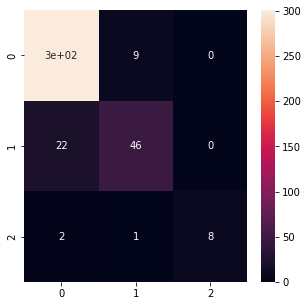

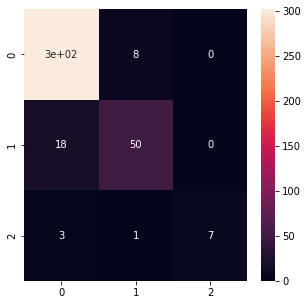

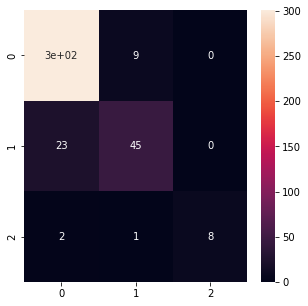

In [47]:
model_accuracy = evaluate(df_no_outliers)

In [48]:
model_accuracy.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,Train_acc
1,CatBoost,0.922879,0.998714
0,XGB,0.912596,0.998714
2,RFC,0.910026,0.998714


We can deduce from the confusion matrix that our models mostly overfit on the training set.

#### Using a RobustScaler

In [49]:
from sklearn.preprocessing import RobustScaler

df = df_checkpoint.copy()

sc = RobustScaler()
df[features] = sc.fit_transform(df[features])

df_robust = df.copy()

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
0,XGB,0.962441,1.0
1,CatBoost,0.962441,1.0
2,RFC,0.953052,1.0


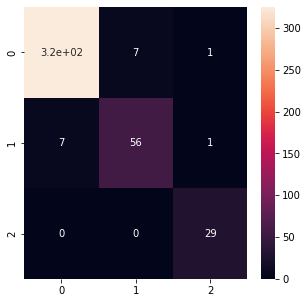

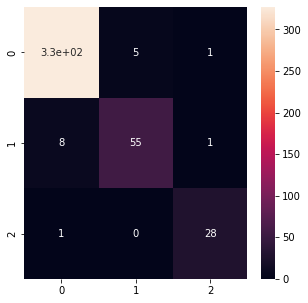

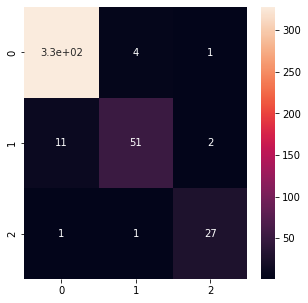

In [50]:
evaluate(df_robust).sort_values(by=['Accuracy'], ascending=False)

Our models overfit less on the training set and are more accurate than when we removed the outliers. 

#### Sum up : The `RobustScaler` is a better solution for our problem

### Dealing with Skewness

During the preparation of this notebook, we tried many transformations to deal with the skewness of our independent variables; such as $log(x+1)$ transformation, boxcox transformations and other `sklearn` transformers.

Here are the results.

#### Using a boxcox Transformation

In [51]:
df = df_checkpoint.copy()

for feature in features:
    if np.abs(stats.skew(df[feature])) > 0.5:
        df[feature] = stats.boxcox(df[feature].apply(lambda x: x + df[feature].min() + 1))[0]

In [52]:
feature_skewness = pd.DataFrame(columns=['Feature', 'Skewness', 'ABS(Skewness)'])

for feature in features:
    feature_skewness = feature_skewness.append({'Feature' : feature, 'Skewness' : stats.skew(df[feature]),
                                                'ABS(Skewness)' : np.abs(stats.skew(df[feature]))}, ignore_index=True)

In [53]:
feature_skewness.sort_values(by=['ABS(Skewness)'], ascending=False)[['Feature', 'Skewness']]

,Feature,Skewness
5,severe_decelerations,17.341211
6,prolongued_decelerations,3.005865
2,fetal_movement,1.840413
15,histogram_number_of_zeroes,1.243962
4,light_decelerations,0.692402
9,percentage_of_time_with_abnormal_long_term_var...,0.525306
18,histogram_median,-0.478077
1,accelerations,0.380743
11,histogram_width,0.314013
20,histogram_tendency,-0.311412


In [54]:
sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

df_boxcox = df.copy()

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
0,XGB,0.957746,1.000000
1,CatBoost,0.957746,1.000000
2,RFC,0.941315,0.999412


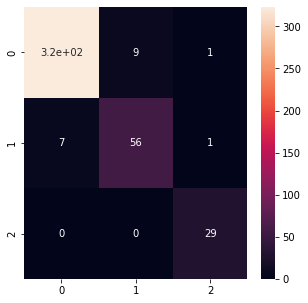

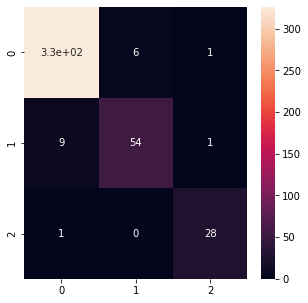

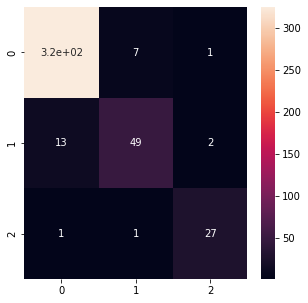

In [55]:
evaluate(df_boxcox).sort_values(by=['Accuracy'], ascending=False)

#### Using a QuantileTransformer

In [56]:
from sklearn.preprocessing import QuantileTransformer

df = df_checkpoint.copy()

sc = QuantileTransformer()
df[features] = sc.fit_transform(df[features])

df_qt_trans = df.copy()

In [57]:
feature_skewness = pd.DataFrame(columns=['Feature', 'Skewness', 'ABS(Skewness)'])

for feature in features:
    feature_skewness = feature_skewness.append({'Feature' : feature, 'Skewness' : stats.skew(df[feature]),
                                                'ABS(Skewness)' : np.abs(stats.skew(df[feature]))}, ignore_index=True)

In [58]:
feature_skewness.sort_values(by=['ABS(Skewness)'], ascending=False)[['Feature', 'Skewness']]

,Feature,Skewness
5,severe_decelerations,17.341211
6,prolongued_decelerations,3.009146
15,histogram_number_of_zeroes,1.259775
2,fetal_movement,0.568725
9,percentage_of_time_with_abnormal_long_term_var...,0.451202
4,light_decelerations,0.435826
20,histogram_tendency,0.189534
3,uterine_contractions,-0.143639
19,histogram_variance,-0.053638
10,mean_value_of_long_term_variability,-0.035771


Before running our model, let's take a moment to appreciate how better our transformer dealt with the skewness of our independent variables than the boxcox transformation. It is safe to expect better results.

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
0,XGB,0.962441,1.0
1,CatBoost,0.962441,1.0
2,RFC,0.941315,1.0


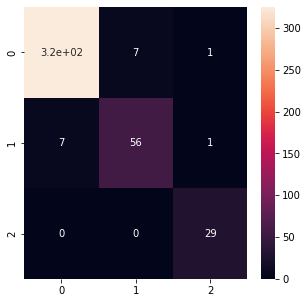

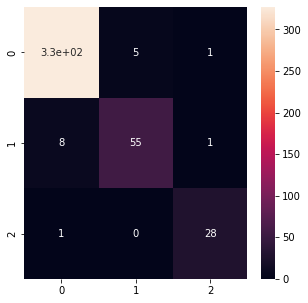

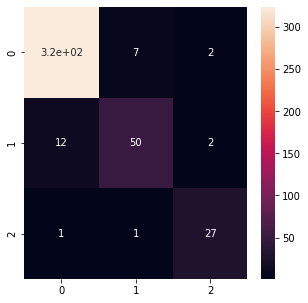

In [59]:
evaluate(df_qt_trans).sort_values(by=['Accuracy'], ascending=False)

Indeed, the `QuantileTransformer` (This method transforms the features to follow a uniform or a normal distribution. <small><i>source: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html">scikit-learn.org</a></i></small>). This transformer also implements a `RobustScaler`. Which means that our models will be far more resistant to outliers.

### Multicolinearity and Dimensionnality Reduction

To reduce dimensionnality and multicolinearity, many algorithms can be used. We have chosen to use the `Principal Component Analysis` and the `Variance Inflation Factor` due to their popularity and wide usage.

Let's have another look at our actualy correlation matrix.

<AxesSubplot:>

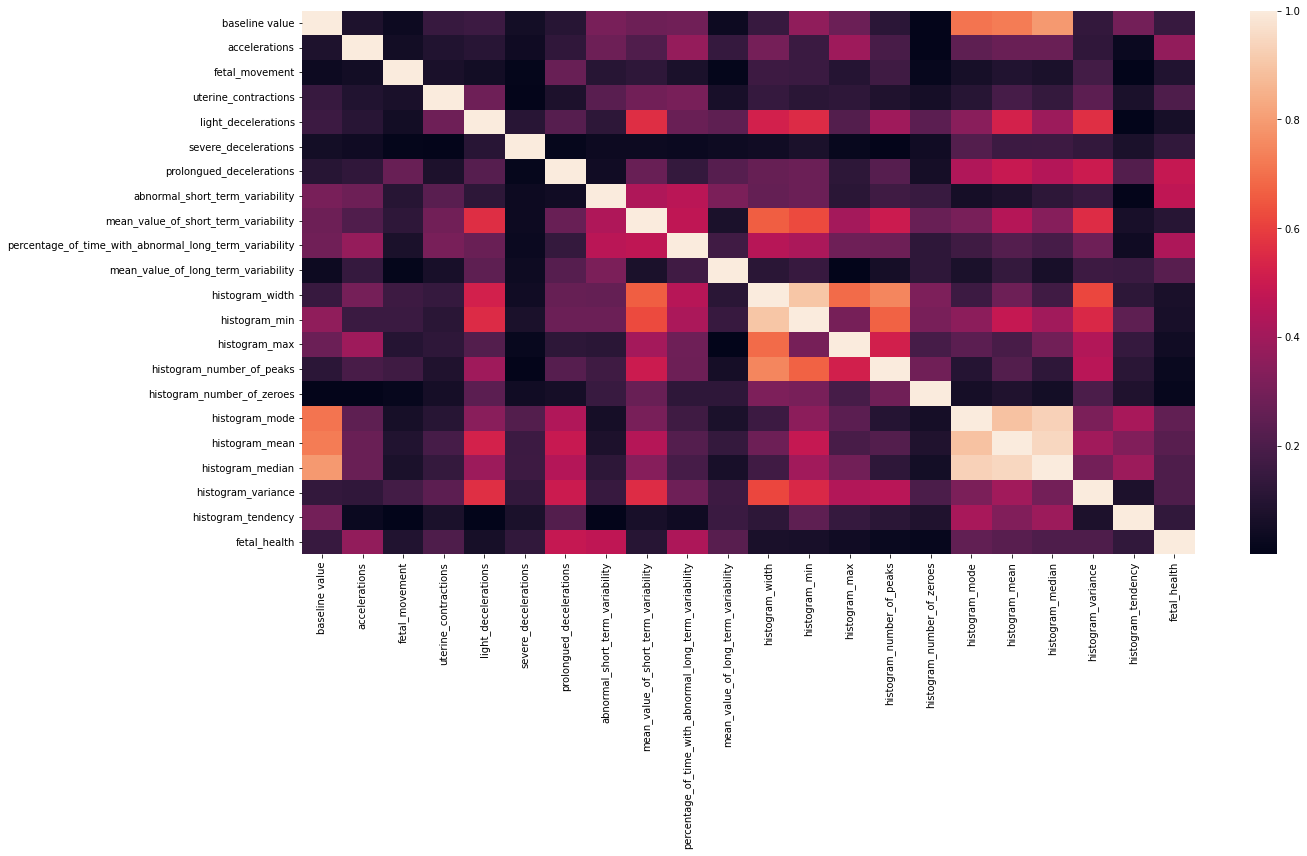

In [60]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_checkpoint.corr().abs())

Quite colorful isn't it :')

#### Using Principal Component Analysis

The `PCA` (for shorts) uses the already existing features of our data to create different new and independent variables. Let's have a look on how it would make our correlation matrix look like.

In [61]:
from sklearn.decomposition import PCA

df = df_checkpoint.copy()

sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

pca = PCA()
X = pca.fit_transform(df[features])

df = pd.concat([pd.DataFrame(X), df[target]], axis=1)

df_pca = df.copy()

<AxesSubplot:>

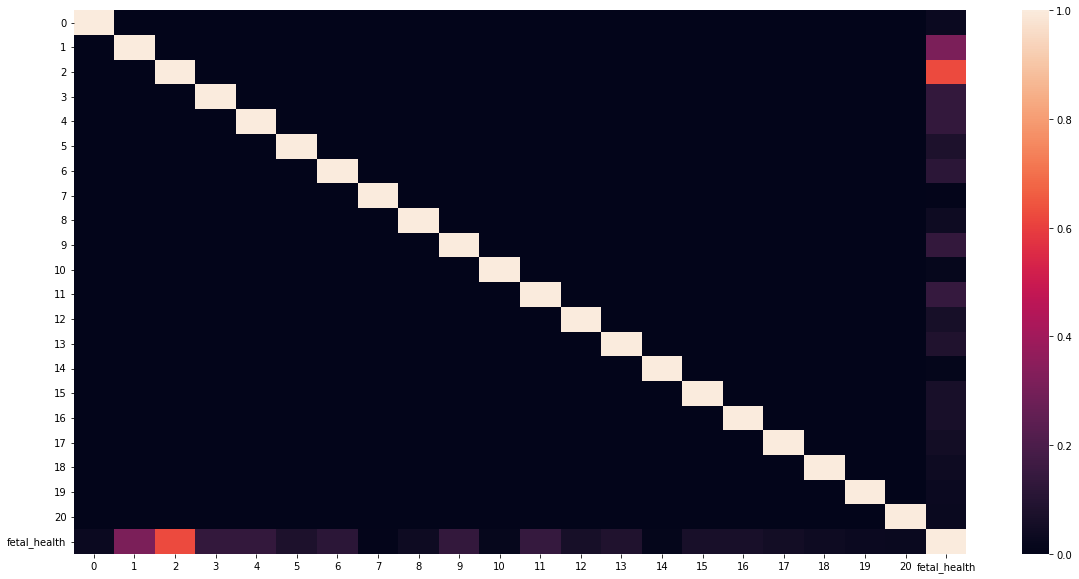

In [62]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_pca.corr().abs())

Works like a charm, right?!

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
1,CatBoost,0.934272,1.0
2,RFC,0.922535,1.0
0,XGB,0.917840,1.0


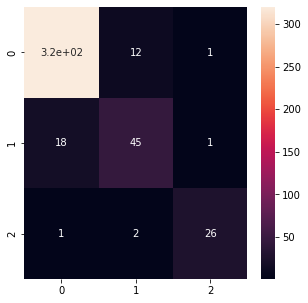

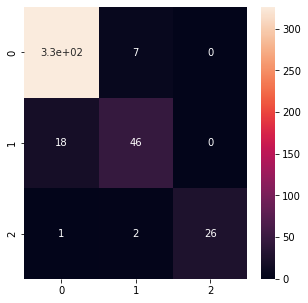

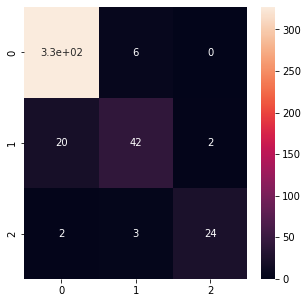

In [63]:
evaluate(df_pca).sort_values(by=['Accuracy'], ascending=False)

#### Using Variance Inflation Factor

We will measure the `VIF` (for shorts) for each independent variable and then remove the variable with the highest value. Then redo our process all over again. This way we'll ensure that at a threshold we will be having most likely totally independent variables.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = df_checkpoint.copy()

df.drop('severe_decelerations', axis=1)
vif_features = df.columns.drop('fetal_health')

sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

vif_data = pd.DataFrame()
vif_data["feature"] = vif_features
vif_data["VIF"] = [variance_inflation_factor(df[vif_features].values, i)
                          for i in range(len(vif_features))]

while vif_data["VIF"].max() > 700:
    df.drop(vif_data[vif_data["VIF"] == vif_data["VIF"].max()]["feature"], axis=1, inplace=True)
    vif_features = df.columns.drop('fetal_health')
    vif_data = pd.DataFrame()
    vif_data["feature"] = vif_features
    vif_data["VIF"] = [variance_inflation_factor(df[vif_features].values, i)
                          for i in range(len(vif_features))]

df_vif = df.copy()

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<AxesSubplot:>

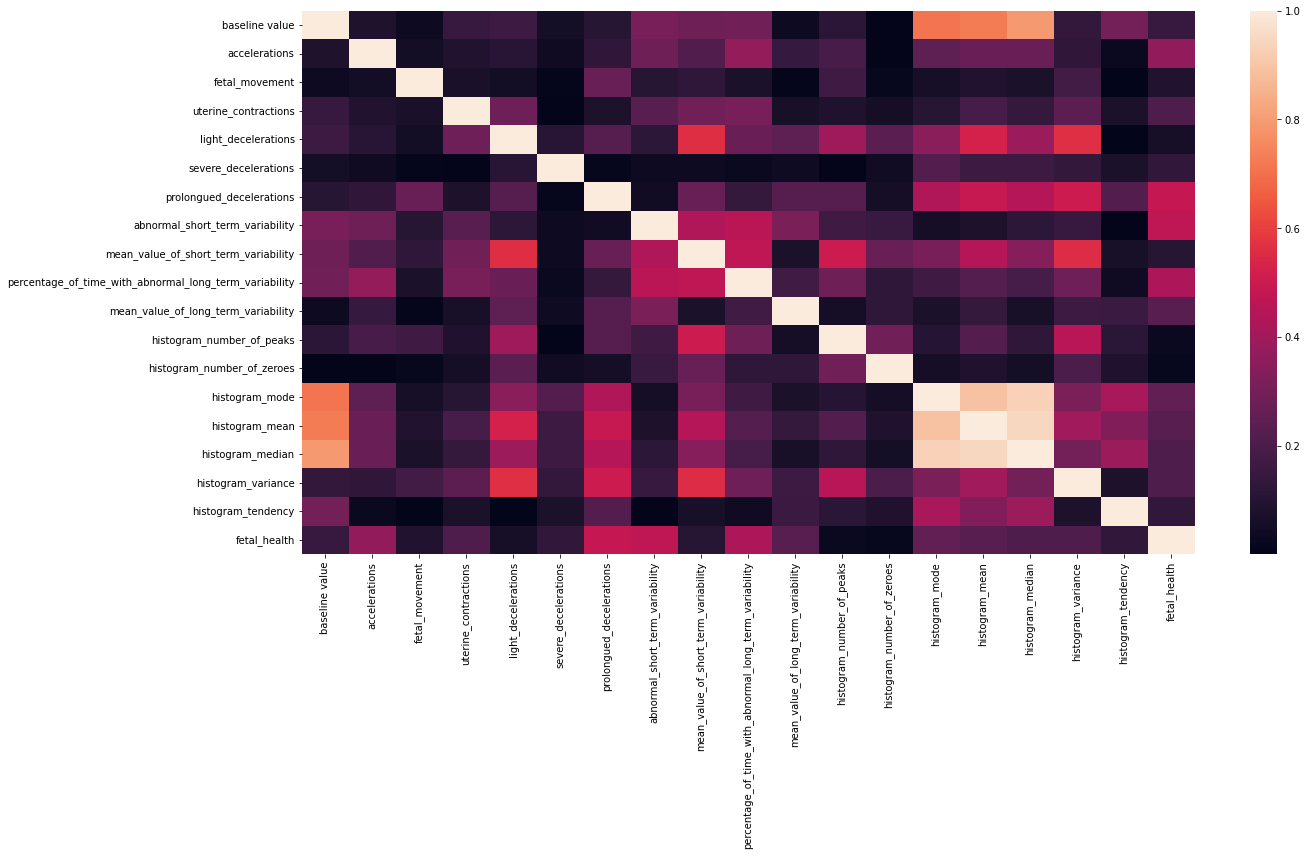

In [65]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_vif.corr().abs())

This doesn't look as perfect as the `PCA` results, but let's hope for the best.

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
0,XGB,0.964789,1.0
1,CatBoost,0.962441,1.0
2,RFC,0.946009,1.0


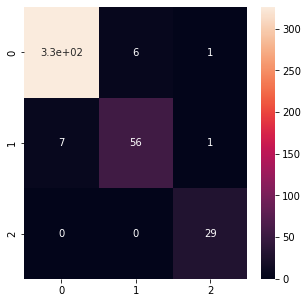

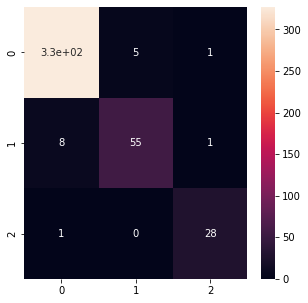

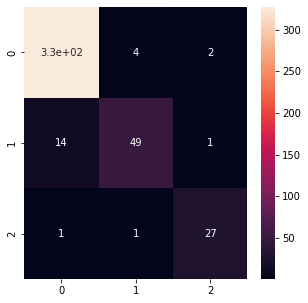

In [66]:
evaluate(df_vif).sort_values(by=['Accuracy'], ascending=False)

Looks like the `VIF` method provides better results than the `PCA` one. We'll keep in mind using it when we assemble all of our prime methods.

### Balancing Data / Oversampling

We noticed that our data is heavily unbalanced. Let's do a basic oversampling of our data. We'll duplicate some rows until we get a pretty much balanced one.

In [69]:
from sklearn.utils import resample

df = df_checkpoint.copy()

target_count = df[df.fetal_health==1][target].count()

# Separate Target Classes
df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=target_count,    # to match majority class
                                 random_state=123) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=target_count,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_1, df_2_upsampled, df_3_upsampled])
 
# Display new class counts
df.fetal_health.value_counts()

sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

df_balanced = df.copy()

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
0,XGB,0.993958,0.999748
2,RFC,0.989930,0.999748
1,CatBoost,0.988922,0.999748


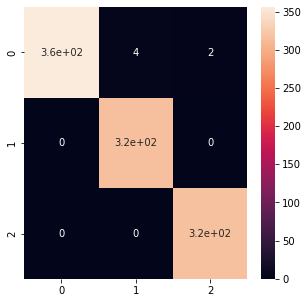

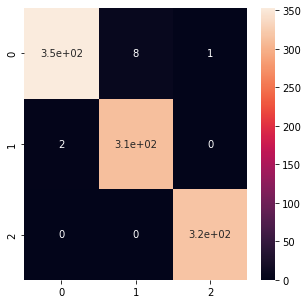

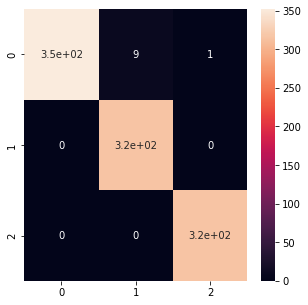

In [70]:
evaluate(df_balanced).sort_values(by=['Accuracy'], ascending=False)

It looks like this method *a porté fruit*, We've achieved a 98% accuracy on our top models.

## Advanced Feature Engineering sum up

Let's put everything we decided to use up to now in one cell, and evaluate our models.

To sum it up, so far we've decided to basically use :

* Data Balancing
* QuantileTransformer
* Variance inflation factor

In [79]:
# Balance Data
df = df_checkpoint.copy()

# Separate Target Classes
df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=123) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_1, df_2_upsampled, df_3_upsampled])

sc = QuantileTransformer()
df[features] = sc.fit_transform(df[features])

df.drop('severe_decelerations', axis=1)
vif_features = df.columns.drop('fetal_health')

vif_data = pd.DataFrame()
vif_data["feature"] = vif_features
vif_data["VIF"] = [variance_inflation_factor(df[vif_features].values, i)
                          for i in range(len(vif_features))]

while vif_data["VIF"].max() > 700:
    df.drop(vif_data[vif_data["VIF"] == vif_data["VIF"].max()]["feature"], axis=1, inplace=True)
    vif_features = df.columns.drop('fetal_health')
    vif_data = pd.DataFrame()
    vif_data["feature"] = vif_features
    vif_data["VIF"] = [variance_inflation_factor(df[vif_features].values, i)
                          for i in range(len(vif_features))]

df_final = df.copy()

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
0,XGB,0.992951,0.999748
2,RFC,0.989930,0.999748
1,CatBoost,0.988922,0.999748


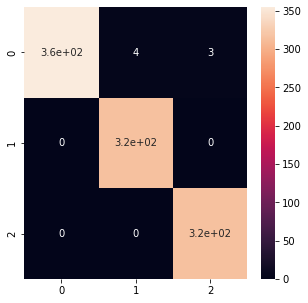

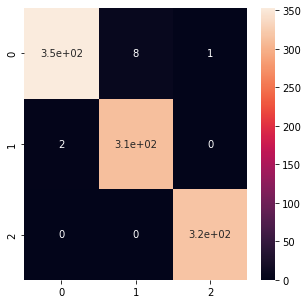

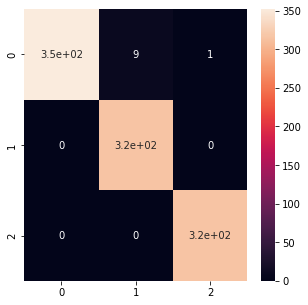

In [80]:
evaluate(df_final).sort_values(by=['Accuracy'], ascending=False)

With this we consider our model selection done.

<img src="https://i.pinimg.com/originals/eb/5b/b2/eb5bb2a98636b7383427411816526792.gif" style="height: 300px;"/>


Note that we've tried hyperparameter tuning for some of our models, but with no considerable embetterment in the results.

## Challenge

Our data didn't have much missing values, on our original dataset. To put ourselves to a challenge, let's add some of them to our data.

<img src="https://media0.giphy.com/media/a3hIJhGT1z5As/giphy.gif" style="height: 200px;"/>

Let's randomly remove up 20% of our data over 17 feature and try imputing them then train and use our models.

In [73]:
df = df_checkpoint.copy()

def please_remove_me(value):
    if np.random.randint(0,100) < 20:
        return np.NaN
    return value

for feature in features[:17]:
    df[feature] = df[feature].map(lambda x: please_remove_me(x))

For starters, let's just use the mean as an imputation strategy for our features.

In [74]:
for feature in features:
    df[feature].fillna(df[feature].mean(), inplace=True)

We'll use the same method we used for our best scores.

In [75]:
# Separate Target Classes
df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=123) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1655,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_1, df_2_upsampled, df_3_upsampled])

sc = QuantileTransformer()
df[features] = sc.fit_transform(df[features])

df.drop('severe_decelerations', axis=1)
vif_features = df.columns.drop('fetal_health')

vif_data = pd.DataFrame()
vif_data["feature"] = vif_features
vif_data["VIF"] = [variance_inflation_factor(df[vif_features].values, i)
                          for i in range(len(vif_features))]

while vif_data["VIF"].max() > 700:
    df.drop(vif_data[vif_data["VIF"] == vif_data["VIF"].max()]["feature"], axis=1, inplace=True)
    vif_features = df.columns.drop('fetal_health')
    vif_data = pd.DataFrame()
    vif_data["feature"] = vif_features
    vif_data["VIF"] = [variance_inflation_factor(df[vif_features].values, i)
                          for i in range(len(vif_features))]

df_noise = df.copy()

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy,Train_acc
2,RFC,0.978852,1.000000
0,XGB,0.973817,0.999748
1,CatBoost,0.967774,0.998238


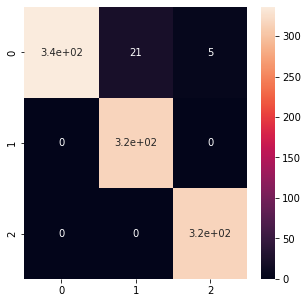

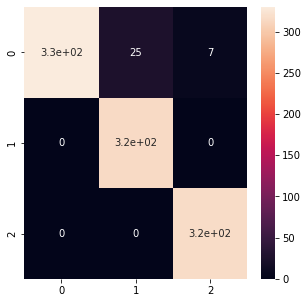

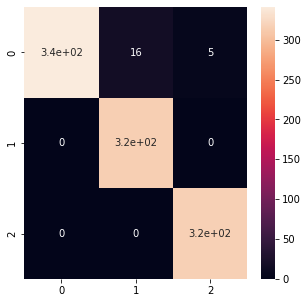

In [76]:
evaluate(df_noise).sort_values(by=['Accuracy'], ascending=False)

It looks like the mean was actually a good bet for imputation. As we are statisfied with over 97% accuracy on our testing set.

# Voting Classifier

Let's actually try a different approach. We'll be using a `Voting Classifier`.

"The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses."
<div style="text-align: right;"><i>source: <a href="https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier">scikit-learn.org</a></i></div>

C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       362
         2.0       0.98      1.00      0.99       315
         3.0       1.00      1.00      1.00       316

    accuracy                           0.99       993
   macro avg       0.99      0.99      0.99       993
weighted avg       0.99      0.99      0.99       993



,Model,Accuracy,Train_acc
0,Voting,0.993958,0.999748


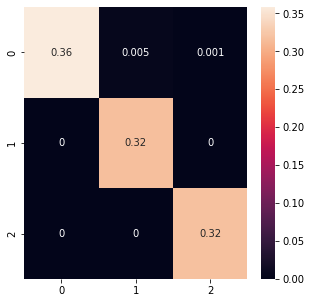

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

df = df_final.copy()

x = df.drop(target, axis=1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = [
            ("XGB", XGBClassifier()),
            ("KNN" , KNeighborsClassifier()),
            ("RFC" , RandomForestClassifier()),
            ("LGBM", LGBMClassifier())]

clf = VotingClassifier(estimators=models, voting='hard')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
fig = plt.figure(figsize=(5,5))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)
model_accuracy = model_accuracy.append({'Model': 'Voting', 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)
model_accuracy

Looks like our voting classifier gives us the best results so far, with 99% accuracy.

## A different approach: Keras & Deep Learning

To step up a bit, let's try using a deep learning algorithm on this relatively small dataset. We'll be exploiting the same results we had on the machine learning section so as not to dive too deep (pun intended).

We will be using a simple Model with two Dense Layers. As for the preprocessing, we'll apply the `RobustScaler` on our variables.

In [93]:
import tensorflow as tf
from sklearn.compose import make_column_transformer

df = df_final.copy()

x = df.drop(target, axis=1)
y = df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ct = make_column_transformer(
  (RobustScaler(), ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']),
)

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)
x_test_normalized = ct.transform(x_test)

y_train_one_hot = tf.one_hot((y_train - 1), depth=3)
y_test_one_hot = tf.one_hot((y_test - 1), depth=3)
y_train_one_hot.shape, y_test_one_hot.shape

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=[21]),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(x_train_normalized, y_train_one_hot, validation_data=(x_test_normalized, y_test_one_hot), epochs=600, verbose=10)

Epoch 1/600
Epoch 2/600
Epoch 3/600
Epoch 4/600
Epoch 5/600
Epoch 6/600
Epoch 7/600
Epoch 8/600
Epoch 9/600
Epoch 10/600
Epoch 11/600
Epoch 12/600
Epoch 13/600
Epoch 14/600
Epoch 15/600
Epoch 16/600
Epoch 17/600
Epoch 18/600
Epoch 19/600
Epoch 20/600
Epoch 21/600
Epoch 22/600
Epoch 23/600
Epoch 24/600
Epoch 25/600
Epoch 26/600
Epoch 27/600
Epoch 28/600
Epoch 29/600
Epoch 30/600
Epoch 31/600
Epoch 32/600
Epoch 33/600
Epoch 34/600
Epoch 35/600
Epoch 36/600
Epoch 37/600
Epoch 38/600
Epoch 39/600
Epoch 40/600
Epoch 41/600
Epoch 42/600
Epoch 43/600
Epoch 44/600
Epoch 45/600
Epoch 46/600
Epoch 47/600
Epoch 48/600
Epoch 49/600
Epoch 50/600
Epoch 51/600
Epoch 52/600
Epoch 53/600
Epoch 54/600
Epoch 55/600
Epoch 56/600
Epoch 57/600
Epoch 58/600
Epoch 59/600
Epoch 60/600
Epoch 61/600
Epoch 62/600
Epoch 63/600
Epoch 64/600
Epoch 65/600
Epoch 66/600
Epoch 67/600
Epoch 68/600
Epoch 69/600
Epoch 70/600
Epoch 71/600
Epoch 72/600
Epoch 73/600
Epoch 74/600
Epoch 75/600
Epoch 76/600
Epoch 77/600
Epoch 78

Epoch 595/600
Epoch 596/600
Epoch 597/600
Epoch 598/600
Epoch 599/600
Epoch 600/600


<AxesSubplot:>

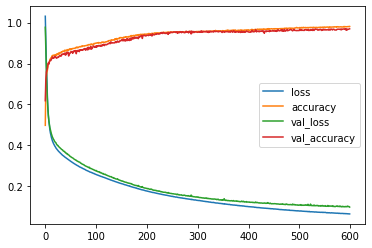

In [94]:
pd.DataFrame(history.history).plot()

We noticed that our model started overfitting around the 600th epoch, so we decided to stop there.

In [95]:
model.evaluate(x_test_normalized, y_test_one_hot)

32/32 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9698


[0.09850480407476425, 0.9697884917259216]

<AxesSubplot:>

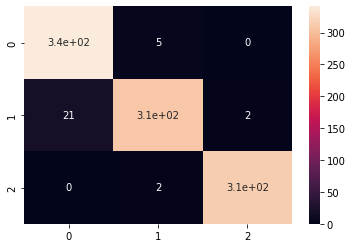

In [98]:
results = model.predict(x_test_normalized)

cfx_matrix = confusion_matrix([list(result).index(max(result)) + 1 for result in results], y_test)

sns.heatmap(cfx_matrix, annot=True)

In [99]:
print(classification_report([list(result).index(max(result)) + 1 for result in results], y_test))

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       346
           2       0.98      0.93      0.95       331
           3       0.99      0.99      0.99       316

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993



We've achieved 97% accuracy on our dataset, which is quite a **LOT**. Whilist not being as precise as the other models on all the classes, it overfitted a little bit on the 2nd Class (Suspect).

# Conclusion

Throughout this project, we've got put our hands in the dirt using multiple machine learning methods and implementations. 

Our final model that we will be using is the `VotingClassifier` which combines some of the best models we've previously put our hands on. We are satisfied with the 99% accuracy it has on our test dataset.

Note that the deep learning approach proved to be a difficult to understand, yet a fun one. We'd love to share it aswell.